Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [7]:
#load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [8]:
df = pd.read_csv("/content/ToyotaCorolla.csv", encoding= 'unicode_escape')
df

Id  ... Tow_Bar
0        1  ...       0
1        2  ...       0
2        3  ...       0
3        4  ...       0
4        5  ...       0
...    ...  ...     ...
1431  1438  ...       0
1432  1439  ...       0
1433  1440  ...       0
1434  1441  ...       0
1435  1442  ...       0

[1436 rows x 38 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [10]:
df1 = pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)
df1.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [11]:
df2 = df1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax': 'QT' },axis=1)

In [12]:
#check for missing values
df2.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [13]:
#data types
df2.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
CC        int64
Doors     int64
Gears     int64
QT        int64
Weight    int64
dtype: object

In [14]:
df2[df2.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
113  24950    8  13253  116  2000      5      5  234    1320

In [15]:
df3 =df2.drop_duplicates().reset_index(drop=True)
df3

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

# Correlation matrix

In [16]:
df3.corr()

Price       Age        KM  ...     Gears        QT    Weight
Price   1.000000 -0.876273 -0.569420  ...  0.063831  0.211508  0.575869
Age    -0.876273  1.000000  0.504575  ... -0.005629 -0.193319 -0.466484
KM     -0.569420  0.504575  1.000000  ...  0.014890  0.283312 -0.023969
HP      0.314134 -0.155293 -0.332904  ...  0.209642 -0.302287  0.087143
CC      0.124375 -0.096549  0.103822  ...  0.014732  0.305982  0.335077
Doors   0.183604 -0.146929 -0.035193  ... -0.160101  0.107353  0.301734
Gears   0.063831 -0.005629  0.014890  ...  1.000000 -0.005125  0.021238
QT      0.211508 -0.193319  0.283312  ... -0.005125  1.000000  0.621988
Weight  0.575869 -0.466484 -0.023969  ...  0.021238  0.621988  1.000000

[9 rows x 9 columns]

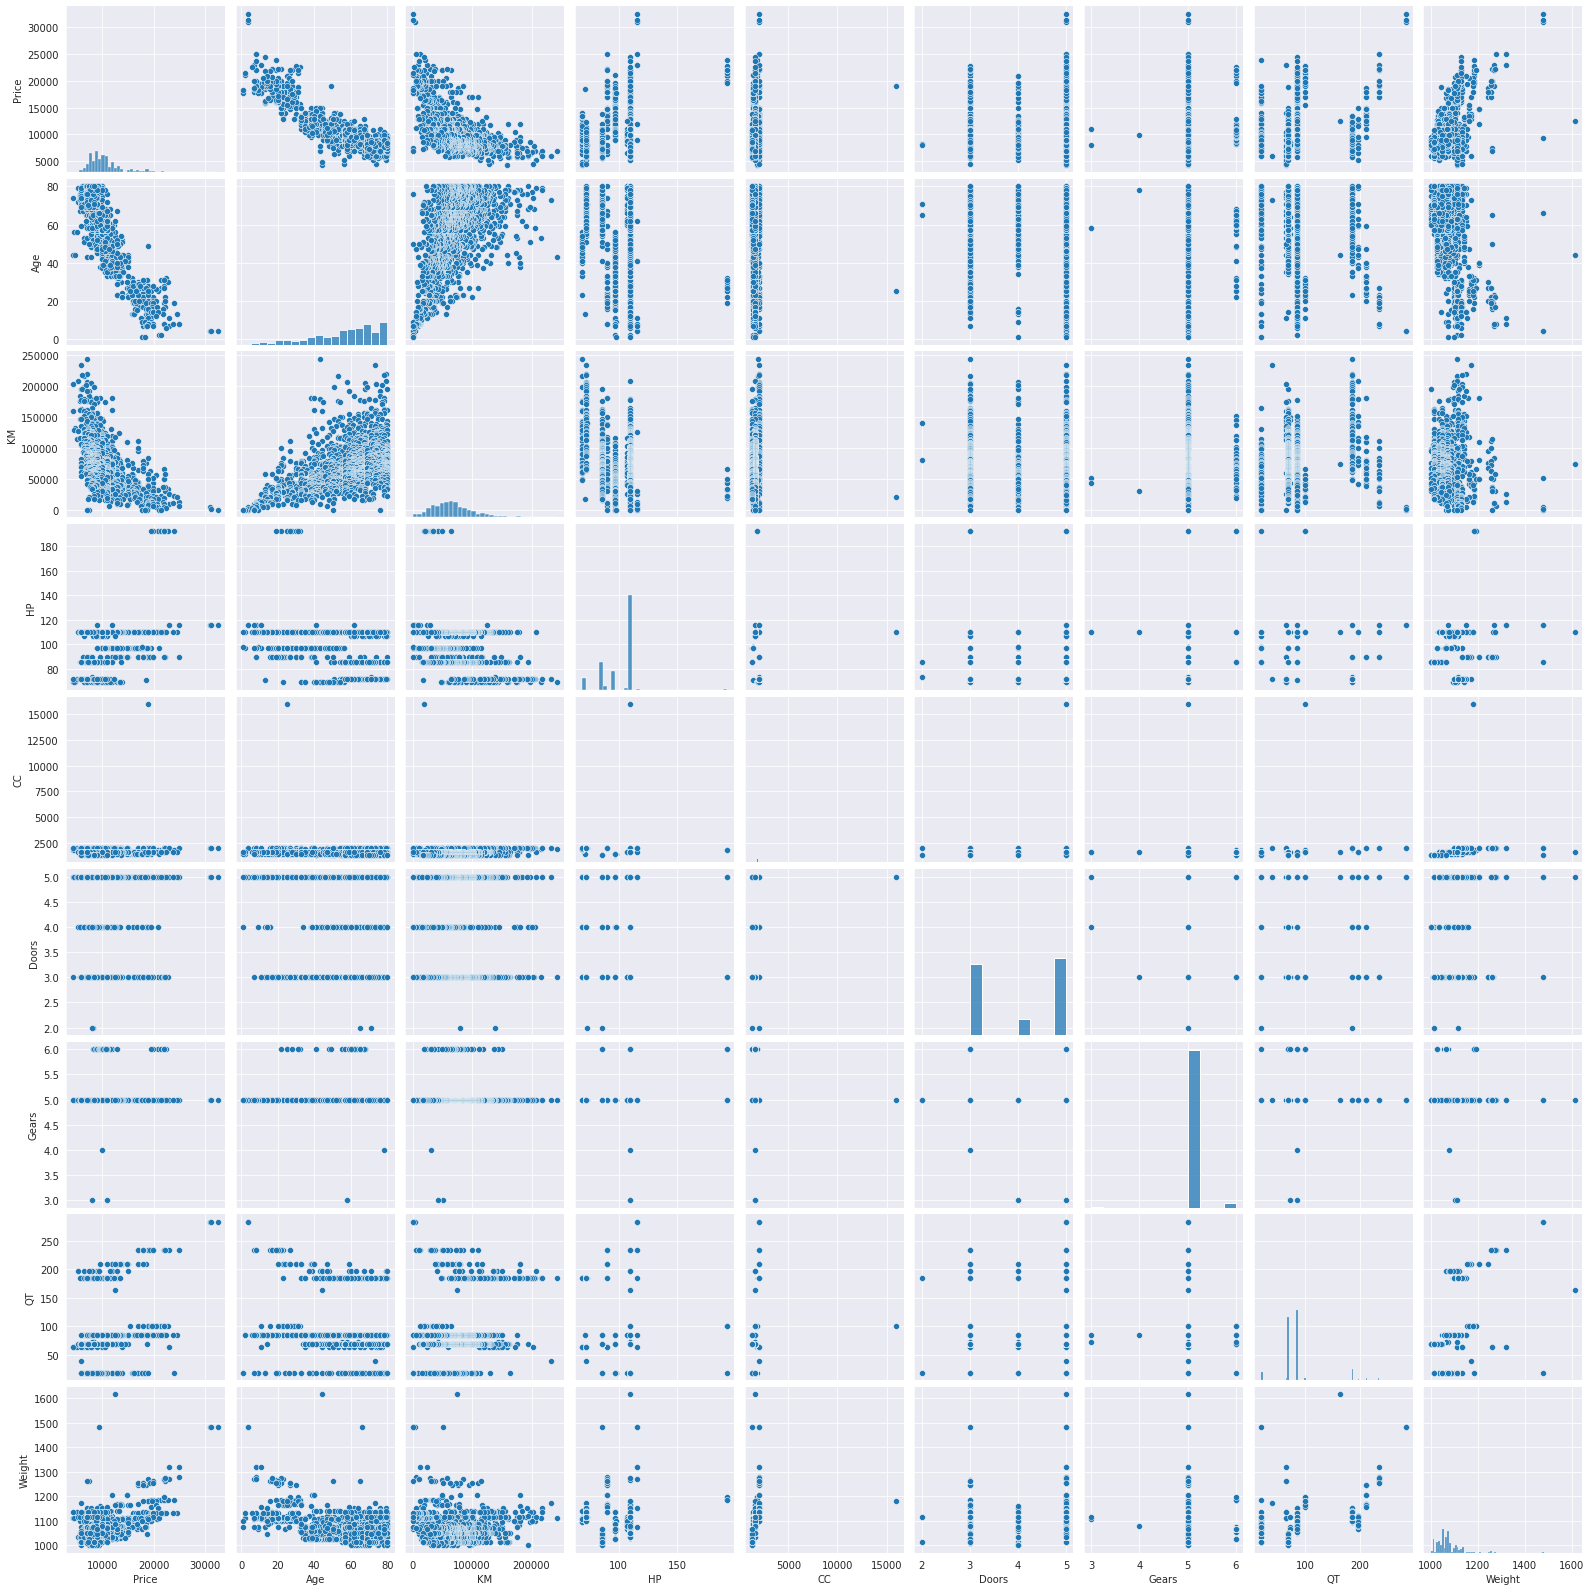

In [17]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df3)

#Preparing a Model

In [18]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df3).fit()

In [19]:
#Coefficients
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [20]:
#t and p-Values
print(model.tvalues,np.round(model.pvalues,5))

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64


In [21]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

# Simple Linear Regression Model

In [22]:
pr_cc=smf.ols('Price~CC',data = df3 ).fit()  
#t and p-Values
print(pr_cc.tvalues, '\n', pr_cc.pvalues)  #this value is significant

Intercept    24.879592
CC            4.745039
dtype: float64 
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


In [23]:
pr_dr=smf.ols('Price~Doors',data = df3 ).fit()  
#t and p-Values
print(pr_dr.tvalues, '\n', pr_dr.pvalues) #this value is significant

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [24]:
pr_cc_dr=smf.ols('Price~CC+Doors',data = df3 ).fit()  
#t and p-Values
print(pr_cc_dr.tvalues, '\n', pr_cc_dr.pvalues) #this value is significant

Intercept    12.786341
CC            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64


# Checking Collinearity by VIF

In [25]:
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df3).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df3).fit().rsquared  
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~KM+Age+CC+Doors+Gears+QT+Weight',data=df3).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('CC~KM+HP+Age+Doors+Gears+QT+Weight',data=df3).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~KM+HP+CC+Age+Gears+QT+Weight',data=df3).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~KM+HP+CC+Doors+Age+QT+Weight',data=df3).fit().rsquared  
vif_gears = 1/(1-rsq_gears)

rsq_qt = smf.ols('QT~KM+HP+CC+Doors+Gears+Age+Weight',data=df3).fit().rsquared  
vif_qt = 1/(1-rsq_qt)

rsq_wt = smf.ols('Weight~KM+HP+CC+Doors+Gears+QT+Age',data=df3).fit().rsquared  
vif_wt = 1/(1-rsq_wt)

In [26]:
# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

Variables       VIF
0       Age  1.876236
1        KM  1.757178
2        HP  1.419180
3        CC  1.163470
4     Doors  1.155890
5     Gears  1.098843
6        QT  2.295375
7    Weight  2.487180

No variable has vif>20 thus no collinearity

# Residual Analysis

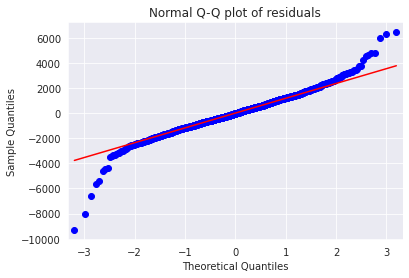

In [27]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [28]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [29]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

# Residual plot for Homoscedasticity

In [30]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

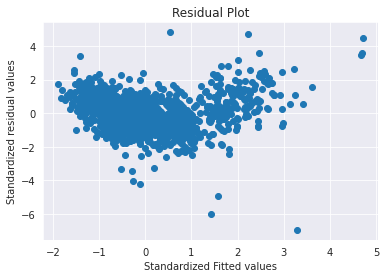

In [31]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual vs Regressors



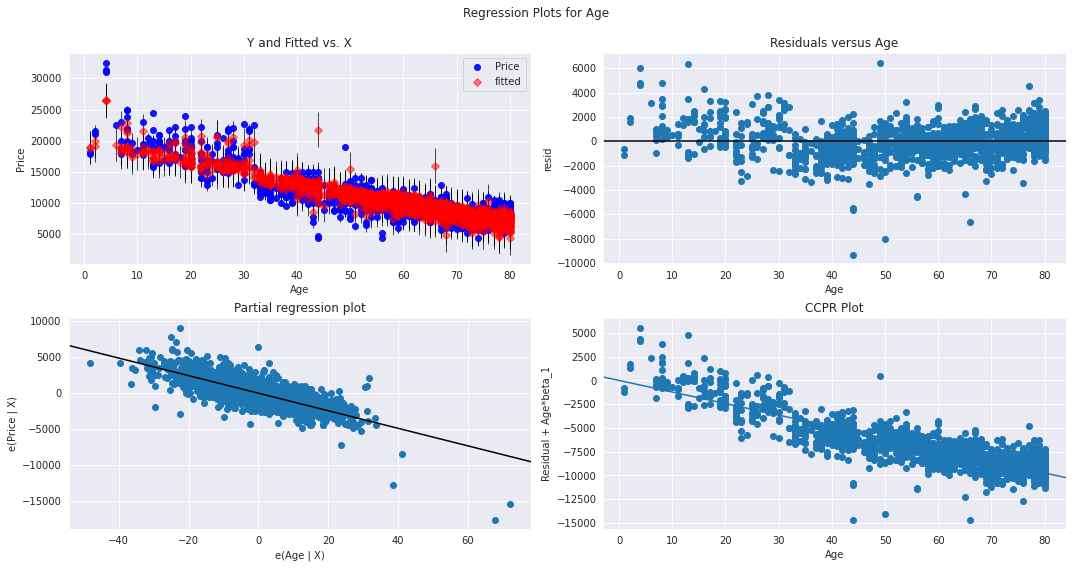

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

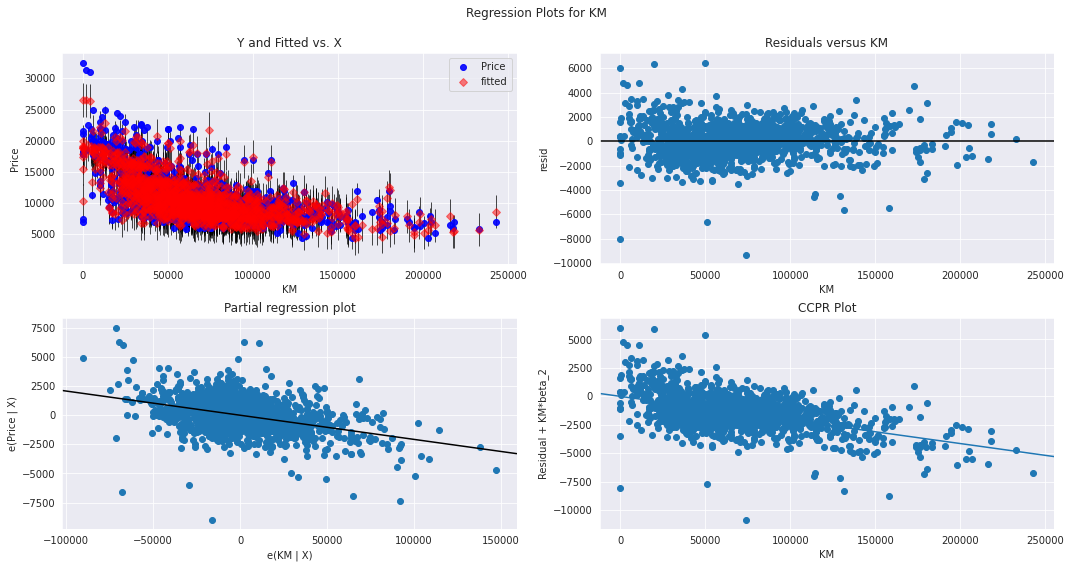

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

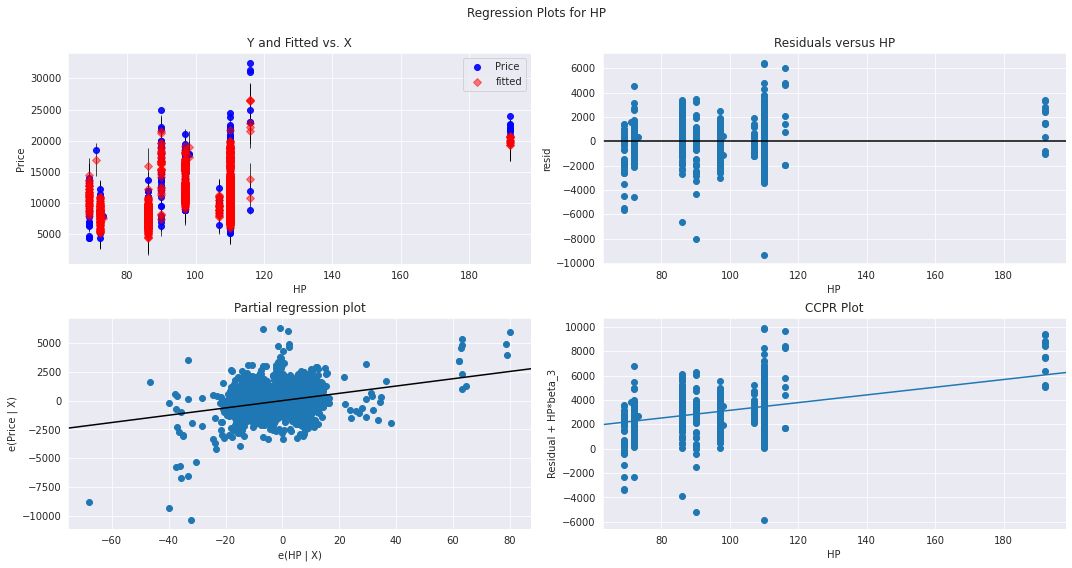

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

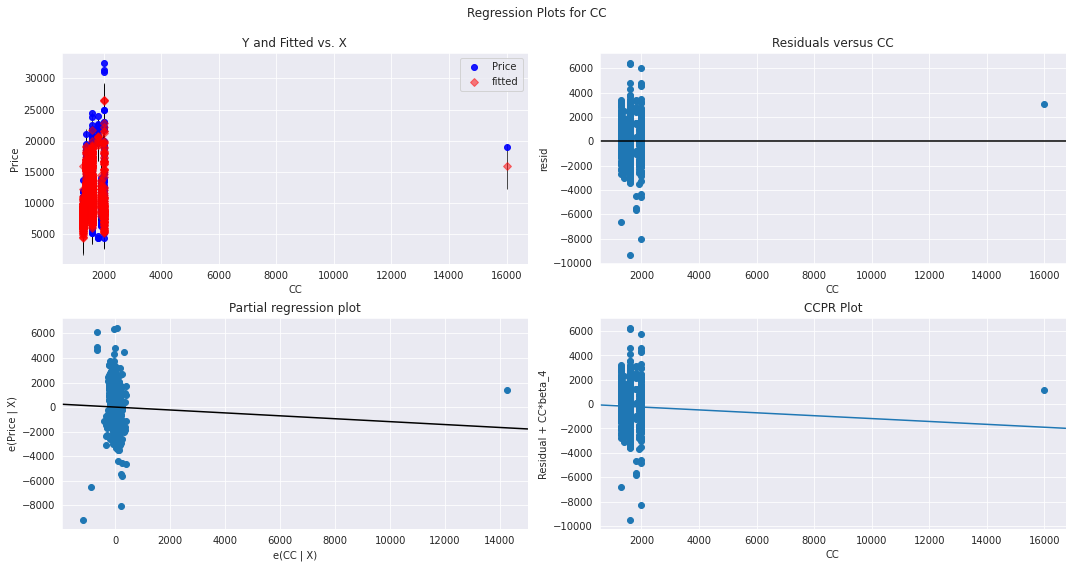

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

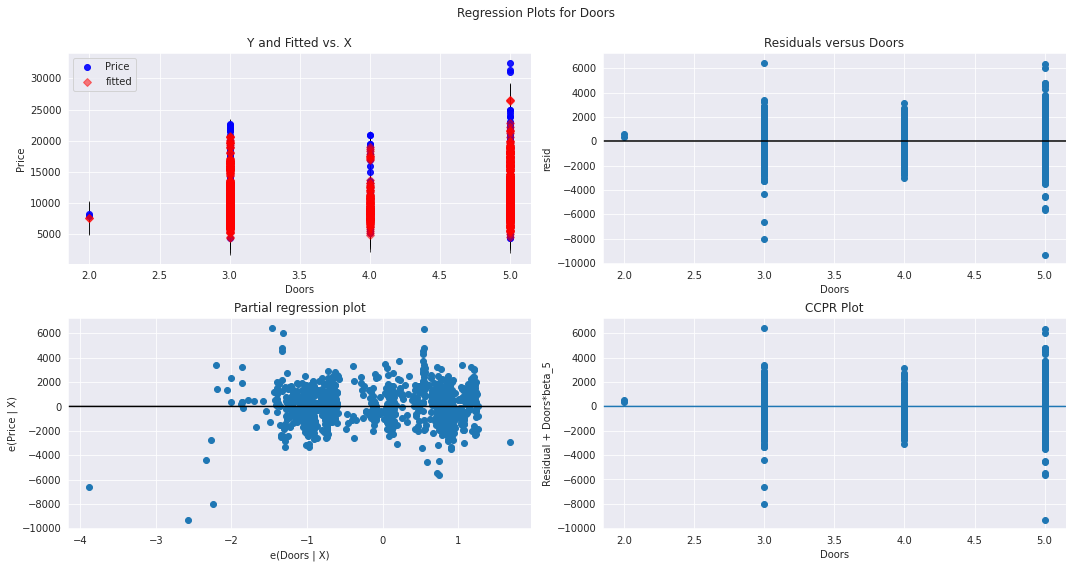

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

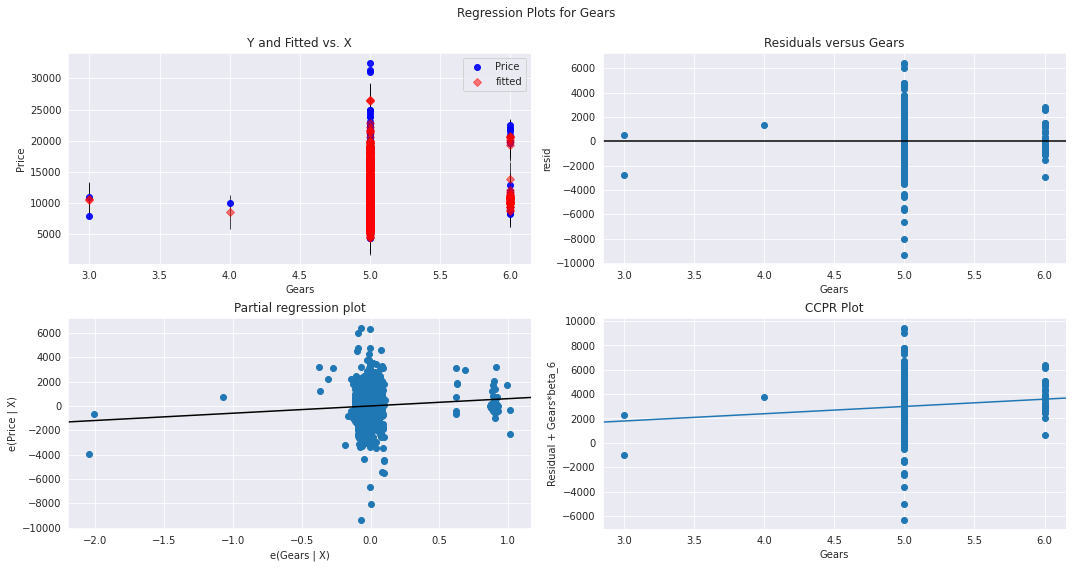

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

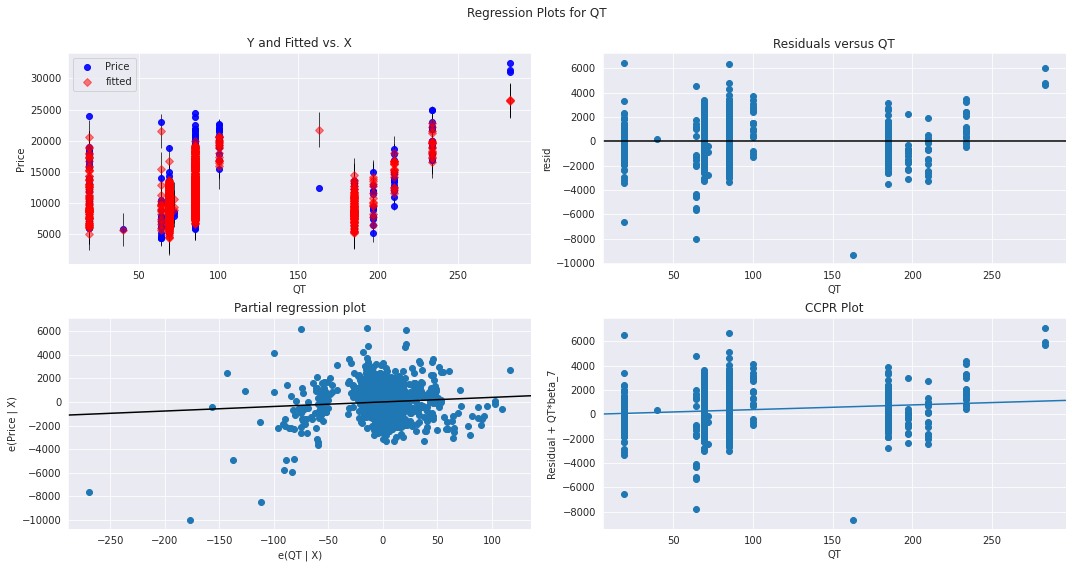

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

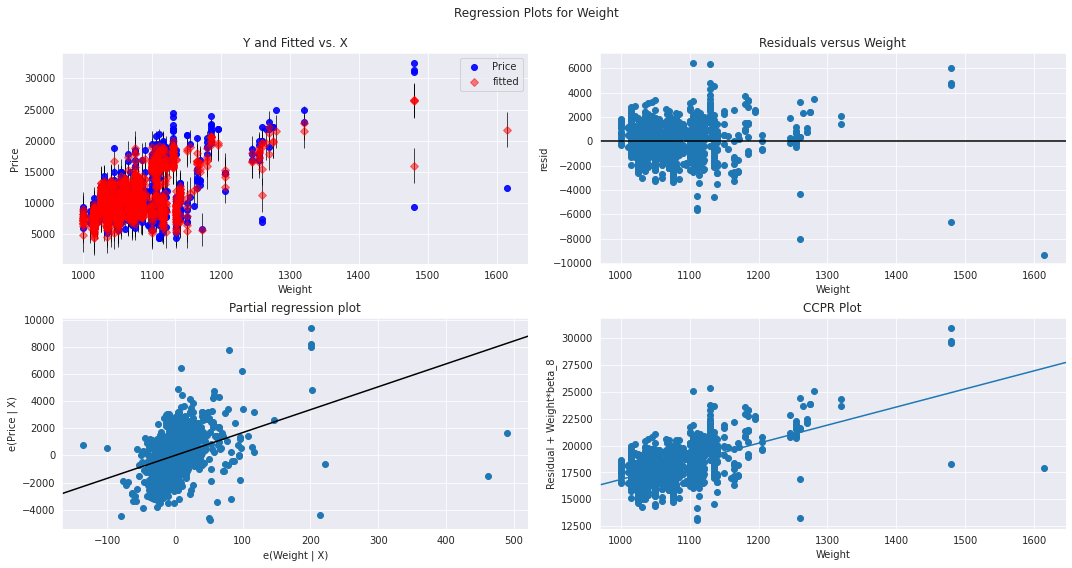

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Delation Diagnostics

Detecting Influencers/Outliers

Cook's Distance

In [40]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


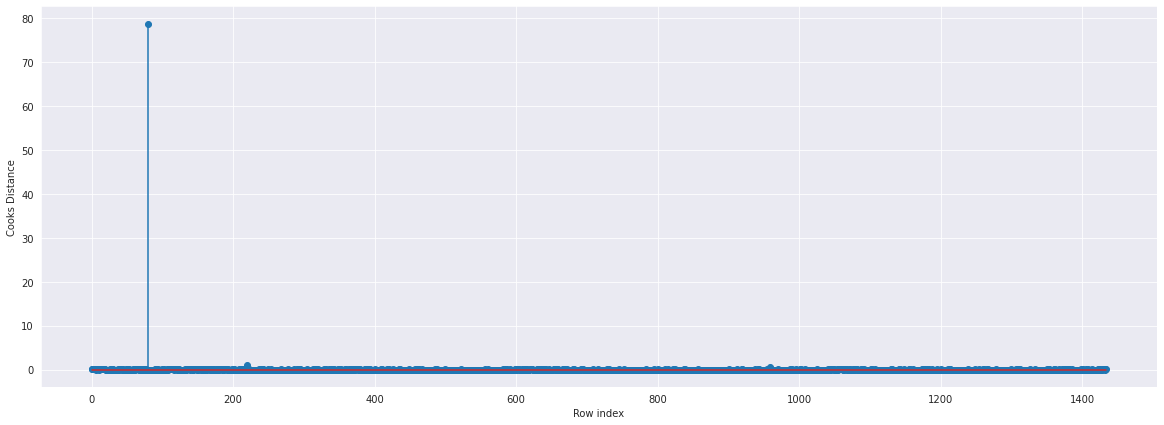

In [41]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582259465)

High Influence Points

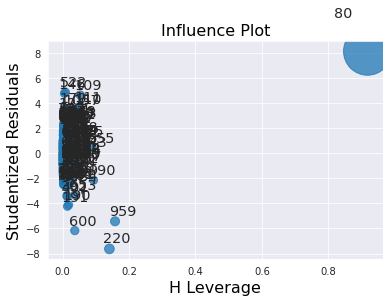

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [44]:
df3.shape

(1435, 9)

In [45]:
k = df3.shape[1]
n = df3.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [46]:
leverage_cutoff

0.020905923344947737

From above it is evident that data point 80 is influencer which is beyond leverage cutoff.

In [47]:
df3[df3.index.isin([80])]

Price  Age     KM   HP     CC  Doors  Gears   QT  Weight
80  18950   25  20019  110  16000      5      5  100    1180

# Improving the Model

In [48]:
#Load the data
df4 = df3.copy()
df4

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [49]:
#Discard the data points which are influencers and reasign the row number (reset_index()
df5=df4.drop(df4.index[[80]],axis=0).reset_index(drop=True)
df5

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1429   7500   69  20544   86  1300      3      5   69    1025
1430  10845   72  19000   86  1300      3      5   69    1015
1431   8500   71  17016   86  1300      3      5   69    1015
1432   7250   70  16916   86  1300      3      5   69    1015
1433   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 9 columns]

# Build Model

In [62]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df4).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df4=df4.drop(df4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df4
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df4).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [63]:
final_model.rsquared

0.8882395145171204

In [64]:
df4

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1426   7500   69  20544   86  1300      3      5   69    1025
1427  10845   72  19000   86  1300      3      5   69    1015
1428   8500   71  17016   86  1300      3      5   69    1015
1429   7250   70  16916   86  1300      3      5   69    1015
1430   6950   76      1  110  1600      5      5   19    1114

[1431 rows x 9 columns]

# Prdeicting for new data

In [65]:
#New data for prediction
new_data=pd.DataFrame({'Age':40,"KM":65000,"HP":75,"CC":1400,"Doors":4,"Gears":4,"QT":19,"Weight":998},index=[1])

In [66]:
# Manual Prediction of Price
final_model.predict(new_data)

1    9168.2995
dtype: float64